In [47]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
bank = pd.read_csv("D:\\ExcelR\\Assigments\\Logistic_Regression\\bank-full.csv")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
bank.shape

(45211, 17)

In [5]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
bank['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [7]:
bank['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [8]:
bank['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [9]:
bank['default'].unique()

array(['no', 'yes'], dtype=object)

In [10]:
bank['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
bank[['job']]=le.fit_transform(bank['job'])

In [13]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,9,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,1,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,11,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [14]:
bank[['marital']]=le.fit_transform(bank['marital'])
bank[['education']]=le.fit_transform(bank['education'])
bank[['default']]=le.fit_transform(bank['default'])
bank[['housing']]=le.fit_transform(bank['housing'])
bank[['loan']]=le.fit_transform(bank['loan'])
bank[['contact']]=le.fit_transform(bank['contact'])
bank[['month']]=le.fit_transform(bank['month'])
bank[['y']]=le.fit_transform(bank['y'])
bank[['poutcome']]=le.fit_transform(bank['poutcome'])

In [15]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [16]:
bank.dtypes

age          int64
job          int32
marital      int32
education    int32
default      int32
balance      int64
housing      int32
loan         int32
contact      int32
day          int64
month        int32
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int32
y            int32
dtype: object

In [17]:
x = bank.drop(labels='y',axis=1)
y = bank['y']

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [19]:
x_train.shape,y_train.shape

((36168, 16), (36168,))

In [20]:
x_test.shape,y_test.shape

((9043, 16), (9043,))

In [21]:
from sklearn.linear_model import LogisticRegression
logr_model = LogisticRegression()

In [22]:
logr_model.fit(x_train,y_train)

LogisticRegression()

In [23]:
y_pred_train = logr_model.predict(x_train)
y_pred_test = logr_model.predict(x_test)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,auc

In [25]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31958
           1       0.56      0.18      0.27      4210

    accuracy                           0.89     36168
   macro avg       0.73      0.58      0.60     36168
weighted avg       0.86      0.89      0.86     36168



In [26]:
print(confusion_matrix(y_train,y_pred_train))

[[31375   583]
 [ 3461   749]]


In [27]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,threshold = roc_curve(y,logr_model.predict_proba(x)[:,1])
auc = roc_auc_score(y_test,y_pred_test)
auc

0.5820053773025882

Text(0, 0.5, 'true positive rate')

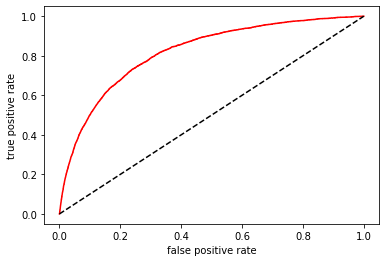

In [28]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label='logit model ( area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

In [29]:
y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

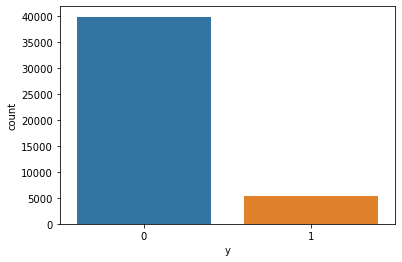

In [30]:
sns.countplot(bank['y'])

# Sampling

In [31]:
p_0 = bank[bank['y']==0]
p_1 = bank[bank['y']==1]

In [32]:
p_0.shape

(39922, 17)

In [33]:
p_1.shape

(5289, 17)

In [34]:
s_0 = p_0.sample(5289)

In [35]:
s_0.shape,p_1.shape

((5289, 17), (5289, 17))

In [36]:
un_sample = pd.concat([s_0,p_1],axis=0)
un_sample

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
6739,60,1,1,0,0,228,1,0,2,28,8,249,11,-1,0,3,0
25499,45,2,1,2,0,2185,1,0,0,19,9,167,4,-1,0,3,0
9259,41,4,1,2,0,140,1,0,2,5,6,65,3,-1,0,3,0
33889,30,7,2,2,0,803,0,0,0,30,0,243,1,-1,0,3,0
20699,60,5,1,3,0,878,0,0,0,13,1,106,2,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,5,1,1,0,2850,0,0,0,17,9,300,1,40,8,0,1
45205,25,9,2,1,0,505,0,1,0,17,9,386,2,-1,0,3,1
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1


In [37]:
x_s = un_sample.iloc[:,:16]
y_s = un_sample['y']

In [38]:
x_strain,x_stest,y_strain,y_stest = train_test_split(x_s,y_s,test_size=0.2)

In [39]:
un_model = LogisticRegression().fit(x_strain,y_strain)

In [40]:
y_pred_train = un_model.predict(x_strain)
y_pred_test = un_model.predict(x_stest)

In [41]:
print(confusion_matrix(y_strain,y_pred_train))

[[3356  885]
 [1105 3116]]


In [42]:
print(confusion_matrix(y_stest,y_pred_test))

[[829 219]
 [269 799]]


In [43]:
print(classification_report(y_strain,y_pred_train))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77      4241
           1       0.78      0.74      0.76      4221

    accuracy                           0.76      8462
   macro avg       0.77      0.76      0.76      8462
weighted avg       0.77      0.76      0.76      8462



In [44]:
fpr,tpr,threshold = roc_curve(y,un_model.predict_proba(x)[:,1])
auc = roc_auc_score(y_stest,y_pred_test)
auc

0.7695789375875576

Text(0, 0.5, 'true positive rate')

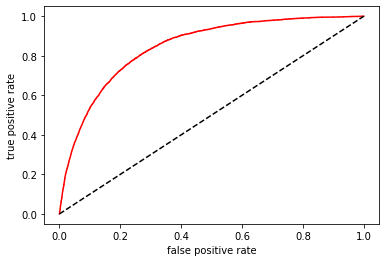

In [45]:
plt.plot(fpr,tpr,color = 'red',label='logit model ( area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')